Juntamos Asignaciones Caso  con las demandas por bodega, para determinar cuanta demanda es asignada a cada una de las bodegas que se abrem 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Bases de datos

# Ventas categorizadas y asignación resultante
bdd_ventas = pd.read_excel("BDD_Bodegas_Categorizada.xlsx")
bdd_asignaciones = pd.read_excel("Resultados/tiempos_p_3_Manhattan.xlsx")
bdd_ventas['Fecha'] = pd.to_datetime(bdd_ventas['Fecha'])
bdd_ventas['Año'] = bdd_ventas['Fecha'].dt.year

# Proyecciones categorizadas y asignación resultante
bdd_proyecciones = pd.read_excel("BDD_Bodegas_Categorizada_proy.xlsx")
bdd_asignaciones_proy = pd.read_excel("Resultados/tiempos_p_3_Manhattan_proy.xlsx")

#Comunas
bdd_comunas = pd.read_excel("BDD_Bodegas.xlsx", sheet_name=3)


In [27]:
# Agrupación de ventas por cliente 
bdd_ventas_agrupadas = bdd_ventas.groupby(['ID Cliente', 'Año']).agg({"Cantidad": "sum", "Comuna Despacho": "first", 'ID Bodega Despacho': 'first', 'Categoria': 'first'}).reset_index()
bdd_ventas_agrupadas = bdd_ventas_agrupadas.merge(bdd_comunas, left_on='Comuna Despacho', right_on='Comuna')
bdd_ventas_agrupadas['Cantidad'] = bdd_ventas_agrupadas['Cantidad'].apply(lambda x: 0.01 if x == 0 else x)

# Agrupación de proyecciones por cliente
bdd_proyecciones_agrupadas = bdd_proyecciones.groupby("ID Cliente").agg({"Cantidad": "sum", "Comuna Despacho": "first", 'ID Bodega Despacho': 'first', 'Categoria': 'first'}).reset_index()
bdd_proyecciones_agrupadas = bdd_proyecciones_agrupadas.merge(bdd_comunas, left_on='Comuna Despacho', right_on='Comuna')
bdd_proyecciones_agrupadas['Cantidad'] = bdd_proyecciones_agrupadas['Cantidad'].apply(lambda x: 0.01 if x == 0 else x)

In [28]:
bdd_historica = bdd_ventas_agrupadas.merge(bdd_asignaciones, left_on = "ID Cliente", right_on = "Unnamed: 0" )
bdd_proyecciones = bdd_proyecciones_agrupadas.merge(bdd_asignaciones_proy, left_on = "ID Cliente", right_on = "Unnamed: 0" )

In [29]:
resultado_1 = bdd_historica.groupby(['Bodega Asignada', 'Año'])['Cantidad'].sum().reset_index()
resultado_2 = bdd_proyecciones.groupby('Bodega Asignada')['Cantidad'].sum().reset_index()

In [32]:
resultado_1

,Bodega Asignada,Año,Cantidad
0,1,2017,7.052968e+04
1,1,2018,1.117268e+05
2,1,2019,1.201880e+05
3,1,2020,1.541155e+05
4,1,2021,2.952299e+05
5,1,2022,1.571276e+05
6,4,2017,1.658810e+05
7,4,2018,2.428851e+05
8,4,2019,3.156269e+05
9,4,2020,3.546894e+05


In [60]:
#Agrupamos todos los años y sacamos promedio anual
resultado_1b = resultado_1.groupby('Bodega Asignada')['Cantidad'].mean().reset_index()
resultado_1b["Año"] = "Promedio Histórico"
resultado_1b

,Bodega Asignada,Cantidad,Año
0,1,151486.251951,Promedio Histórico
1,4,582747.428034,Promedio Histórico
2,8,266578.749976,Promedio Histórico


In [44]:
resultado_2["Año"] = "Proyección"
resultado_2


,Bodega Asignada,Cantidad,Año
0,1,4.676866e+05,Proyección
1,4,3.136619e+06,Proyección
2,8,1.058310e+06,Proyección


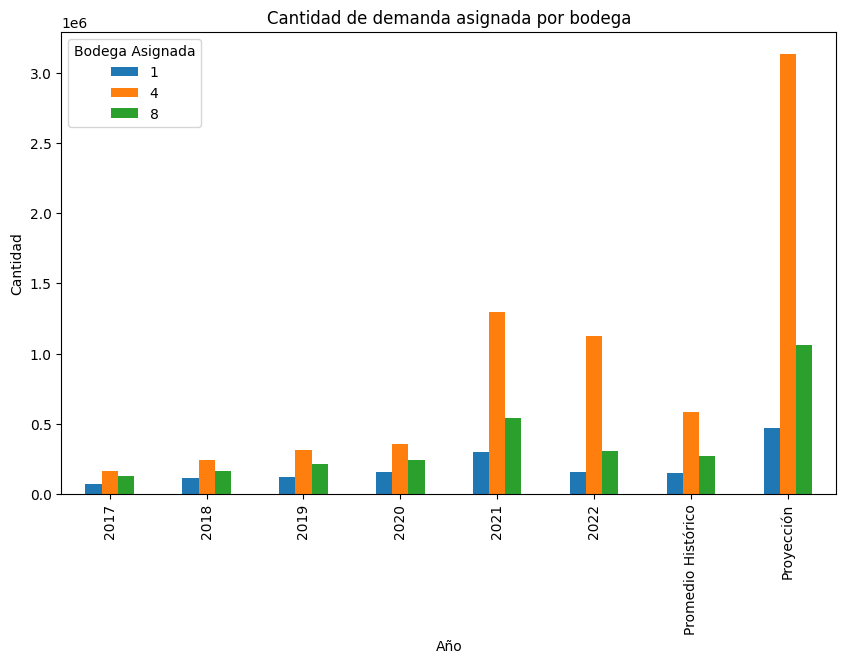

In [57]:
combined_df = pd.concat([resultado_1, resultado_1b, resultado_2])

pivot_df = combined_df.pivot(index='Año', columns='Bodega Asignada', values='Cantidad')
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Cantidad de demanda asignada por bodega')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='Bodega Asignada')
plt.show()


In [63]:
#Código construído ocupando ChatGPT

from sklearn.linear_model import LinearRegression

# Crear un DataFrame con los datos

df = resultado_1

# Obtener las bodegas únicas
bodegas = df['Bodega Asignada'].unique()

# Crear un modelo de regresión lineal por bodega
proyecciones = []

for bodega in bodegas:
    df_bodega = df[df['Bodega Asignada'] == bodega]
    model = LinearRegression()
    X = df_bodega[['Año']]
    y = df_bodega['Cantidad']
    model.fit(X, y)
    
    # Predecir la cantidad para el año 2032
    year_2032 = 2032
    predicted_value = model.predict([[year_2032]])
    
    proyecciones.append({'Bodega Asignada': bodega, 'Proyeccion_2032': predicted_value[0]})

# Crear un DataFrame con las proyecciones
df_proyecciones = pd.DataFrame(proyecciones)

print(df_proyecciones)



   Bodega Asignada  Proyeccion_2032
0                1     5.148529e+05
1                4     3.432818e+06
2                8     1.001121e+06


c:\Users\Diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
